In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from trader import trader_agent
import cryptomanager as cm
test = trader_agent()

c:\Dev\btard-bot\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = cm.historical_data_df(days_delta=10000)
print(df.dtypes)
df

1995-06-15 00:00:00
date     datetime64[ns, UTC]
Open                 float64
High                 float64
Low                  float64
Close                float64
dtype: object


,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
576087,2022-10-31 15:49:00+00:00,20381.0,20382.0,20381.0,20382.0
576088,2022-10-31 15:50:00+00:00,20382.0,20385.0,20379.0,20384.0
576089,2022-10-31 15:51:00+00:00,20391.0,20402.0,20391.0,20401.0
576090,2022-10-31 15:52:00+00:00,20402.0,20429.0,20402.0,20420.0


In [3]:
# df = pd.read_csv("data/gmedata.csv")
env = gym.make('forex-v0', df=df, frame_bound=(5,len(df)), window_size=5)
df

,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
576087,2022-10-31 15:49:00+00:00,20381.0,20382.0,20381.0,20382.0
576088,2022-10-31 15:50:00+00:00,20382.0,20385.0,20379.0,20384.0
576089,2022-10-31 15:51:00+00:00,20391.0,20402.0,20391.0,20401.0
576090,2022-10-31 15:52:00+00:00,20402.0,20429.0,20402.0,20420.0


info {'total_reward': -397195000.0, 'total_profit': 0.3732168367617104, 'position': 0}


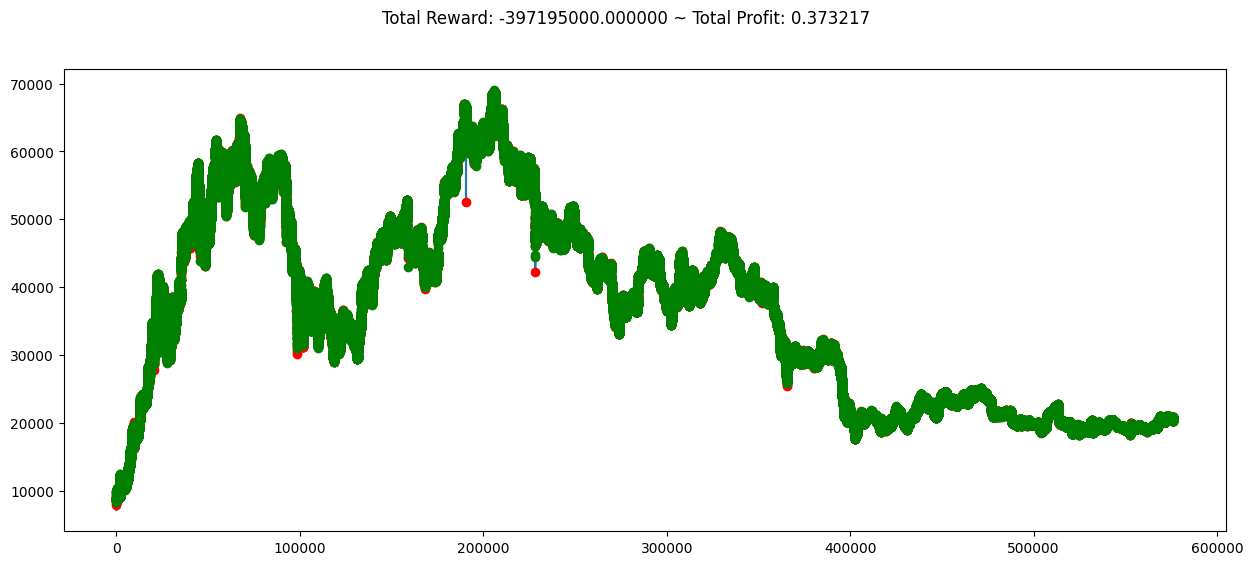

In [4]:
# Examining the model

state = env.reset()
while True: 
    # add a bit of randomness
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [5]:
!pip install finta

In [6]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [7]:
# df['OBV'] = TA.OBV(df)
df['EMA'] = TA.EMA(df, 200)
df['RSI'] = TA.RSI(df)
df.fillna(0, inplace=True)
df = df.join(TA.MACD(df))
df

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
...,...,...,...,...,...,...,...,...,...
576087,2022-10-31 15:49:00+00:00,20381.0,20382.0,20381.0,20382.0,20459.633126,60.050632,5.695489,4.441796
576088,2022-10-31 15:50:00+00:00,20382.0,20385.0,20379.0,20384.0,20458.880558,60.951335,6.341622,4.821761
576089,2022-10-31 15:51:00+00:00,20391.0,20402.0,20391.0,20401.0,20458.304632,67.631634,8.131708,5.483750
576090,2022-10-31 15:52:00+00:00,20402.0,20429.0,20402.0,20420.0,20457.923491,73.158573,10.957197,6.578440


In [8]:
df.head(15)

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
5,2020-04-29 03:18:00+00:00,7836.0,7836.0,7836.0,7836.0,7373.580045,81.219889,37.972569,12.090397
6,2020-04-30 12:48:00+00:00,8829.0,8829.0,8829.0,8829.0,7587.786410,91.696109,94.223816,32.876174
7,2020-04-30 12:56:00+00:00,8734.5,8734.5,8734.5,8734.5,7736.192393,86.737276,125.932608,55.239385
8,2020-05-01 00:00:00+00:00,8653.0,8653.0,8653.0,8653.0,7842.181898,82.589058,141.930720,75.265514
9,2020-05-01 05:31:00+00:00,8826.5,8826.5,8826.5,8826.5,7945.101892,84.309425,160.151292,94.284856


In [9]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','EMA',"MACD","SIGNAL", 'RSI']].to_numpy()[start:end]
    return prices, signal_features

In [10]:

class Cypto_Env(StocksEnv):
    _process_data = add_signals
    
env2 = Cypto_Env(df=df, window_size=12, frame_bound=(12,len(df)))

In [11]:
env2.signal_features

array([[ 7.31400000e+03,  7.31400000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 7.10150000e+03,  7.20721875e+03, -4.76762821e+00,
        -2.64868234e+00,  0.00000000e+00],
       [ 7.10000000e+03,  7.17112118e+03, -6.12141956e+00,
        -4.07193529e+00,  0.00000000e+00],
       ...,
       [ 2.03910000e+04,  2.04583046e+04,  8.13170770e+00,
         5.48375033e+00,  6.76316341e+01],
       [ 2.04020000e+04,  2.04579235e+04,  1.09571969e+01,
         6.57843965e+00,  7.31585734e+01],
       [ 2.04240000e+04,  2.04578248e+04,  1.52796492e+01,
         8.31868157e+00,  7.88814785e+01]])

In [12]:
df.head()

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196


In [13]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [14]:
from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
 
model = A2C('MlpPolicy', env, verbose=1, tensorboard_log=LOG_PATH) 

name = str(datetime.now().strftime("%Y-%d-%m-%H-%M") )
print(name)
episodes = 50
step_count = 100000
for i in range (episodes):
    model.learn(total_timesteps=step_count, tb_log_name=f"A2C - {name}")
    model.save(f"{os.path.join(MODEL_PATH , name)} -{i + 1}.zip")

Using cpu device
2022-31-10-11-54
Logging to ./data\log\A2C - 2022-31-10-11-54_1
------------------------------------
| time/                 |          |
|    fps                | 216      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.194   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 22.2     |
|    value_loss         | 513      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 370      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.185   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199  

In [ ]:
from IPython.display import clear_output
from trader import  trader_agent
import time
import os
trade_me = trader_agent()
prev_min = 0
clear = lambda: os.system('cls')

# clear()
df
env = Cypto_Env(df=df, window_size=12, frame_bound=(len(df)-5,len(df)))
obs = env.reset()
while True: 
    try:
        cur_min = datetime.now().minute
        if cur_min > prev_min or cur_min == 1:
            df = cm.historical_data_df()
            df = df.loc[-5:]
            df['EMA'] = TA.EMA(df, 200)
            df['RSI'] = TA.RSI(df)
            df.fillna(0, inplace=True)
            df = df.join(TA.MACD(df))
            prev_min = cur_min
            env.df = df
            obs = env.reset()

            obs = obs[np.newaxis, ...]
            # print("1", obs)
            action, _states = model.predict(obs)
            # print(_states)
            if action == 1:
                trade_me.buy_position_at_market("BTC/USD")
                # print("b")
            else:
                trade_me.sell_position_market("BTCUSD")
                # print("s")
            obs, rewards, done, info = env.step(action)
            # print("2",obs)
            print(info)
            # clear_output()
    except:
        print("info", info)
        plt.figure(figsize=(10,6))
        plt.cla()
        env.render_all()
        plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()